In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

In [3]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)
mail_box_id = str(db.regist_mail_box(sel_tracks).inserted_id)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(features)

recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [5]:
sel_tracks.head()

,id,name,artists,artists_name,image
0,2y4hHM6c48Qzk0bqh33XfB,Winter Sleep,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2730d378c...
1,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...


In [6]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2y4hHM6c48Qzk0bqh33XfB,0.539,0.237,0,-8.452,0.0273,0.820,0,0.345,0.259,68.045
1,1OQ3PoRZRtE7RH0NIh3p1O,0.359,0.469,7,-8.060,0.0326,0.745,0,0.101,0.259,84.366


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [7]:
recos.head()

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
2,4rwqrKdwlFWJ6LvPYaOtgn,Quit (feat. Ariana Grande),2LZDXcxJWgsJfKXZv9a5eG,Cashmere Cat,https://i.scdn.co/image/ab67616d0000b273747de7...
3,6mDoM5FGbr1Or5nY9pTnLy,Question,5JZ7CnR6gTvEMKX4g70Amv,Lauv,https://i.scdn.co/image/ab67616d0000b273535591...
4,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
5,6jMbPsH6lTOLs5n8Af26AG,Maybe It's Time,"1HY2Jd0NmPuamShAr6KMms,4VIvfOurcf0vuLRxLkGnIG","Lady Gaga,Bradley Cooper",https://i.scdn.co/image/ab67616d0000b273e2d156...


In [8]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2RttW7RAu5nOAfq6YFvApB,0.522,0.385,0,-7.355,0.0288,0.536,0.000000,0.1350,0.236,89.792
1,4rwqrKdwlFWJ6LvPYaOtgn,0.440,0.413,0,-7.365,0.0407,0.105,0.000034,0.0997,0.141,86.911
2,6mDoM5FGbr1Or5nY9pTnLy,0.635,0.496,0,-7.301,0.0936,0.443,0.000000,0.1210,0.373,121.696
3,1cayXr914ctuYeJkv3CPUR,0.677,0.376,0,-9.033,0.0350,0.941,0.000009,0.1770,0.318,83.001
4,6jMbPsH6lTOLs5n8Af26AG,0.699,0.282,7,-7.650,0.0374,0.798,0.000001,0.0981,0.359,79.776


In [9]:
recos

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
2,4rwqrKdwlFWJ6LvPYaOtgn,Quit (feat. Ariana Grande),2LZDXcxJWgsJfKXZv9a5eG,Cashmere Cat,https://i.scdn.co/image/ab67616d0000b273747de7...
3,6mDoM5FGbr1Or5nY9pTnLy,Question,5JZ7CnR6gTvEMKX4g70Amv,Lauv,https://i.scdn.co/image/ab67616d0000b273535591...
4,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
5,6jMbPsH6lTOLs5n8Af26AG,Maybe It's Time,"1HY2Jd0NmPuamShAr6KMms,4VIvfOurcf0vuLRxLkGnIG","Lady Gaga,Bradley Cooper",https://i.scdn.co/image/ab67616d0000b273e2d156...
...,...,...,...,...,...
192,0DXnSV98JM6bwf4fWiUyKb,Holding hands or walking together.,7bWYN0sHvyH7yv1uefX07U,Jukjae,https://i.scdn.co/image/ab67616d0000b273be3023...
193,4wMUV1YyLoaRvKskgmH6Yi,Feel Like Falling In Love,6k4r73Wq8nhkCDoUsECL1e,MeloMance,https://i.scdn.co/image/ab67616d0000b273f31747...
194,3HxEHyCJPT9o9nsGn5pJkl,My Love,60YNqzrSj7rJkuqHkpHPqG,Kim Jong Kook,https://i.scdn.co/image/ab67616d0000b273caea2f...
195,7MyPvDJptZzYkB0LKZnNzq,After A Long Time,3l0MJ9LCiBlMyOMaz485Q5,Baek Ji Young,https://i.scdn.co/image/ab67616d0000b273a54a7b...


### norm data
- 정규화

In [10]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2y4hHM6c48Qzk0bqh33XfB,0.447407,0.111450,0.000000,0.572367,0.005959,0.853556,0.000000,0.436388,0.188426,0.036434
1,1OQ3PoRZRtE7RH0NIh3p1O,0.180741,0.465649,0.636364,0.607628,0.018107,0.775105,0.000000,0.071610,0.188426,0.152234
2,2RttW7RAu5nOAfq6YFvApB,0.422222,0.337405,0.000000,0.671044,0.009397,0.556485,0.000000,0.122440,0.161374,0.190732
3,4rwqrKdwlFWJ6LvPYaOtgn,0.300741,0.380153,0.000000,0.670145,0.036672,0.105649,0.000092,0.069667,0.049635,0.170291
4,6mDoM5FGbr1Or5nY9pTnLy,0.589630,0.506870,0.000000,0.675902,0.157919,0.459205,0.000000,0.101510,0.322512,0.417097


### 추천된 데이터들의 audio features 시각화

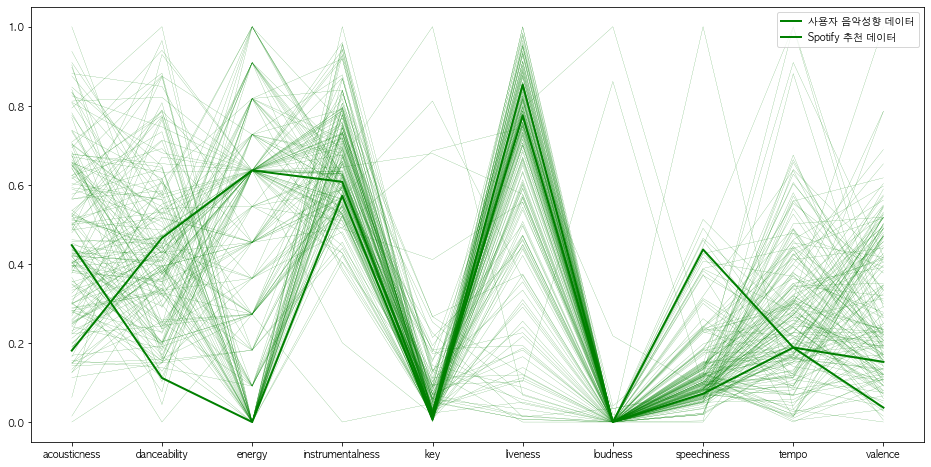

In [11]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans

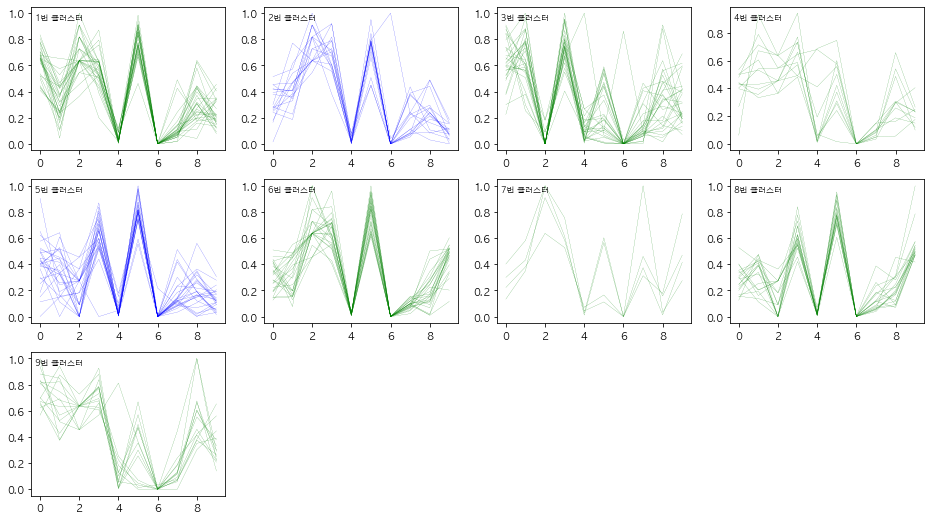

In [12]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

In [13]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

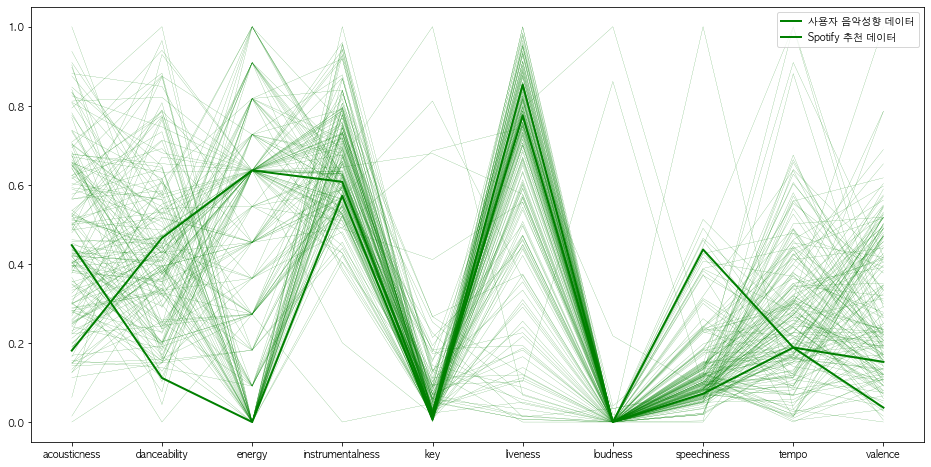

In [14]:
utils.visual_norm_data(sel_tracks, norm_features)

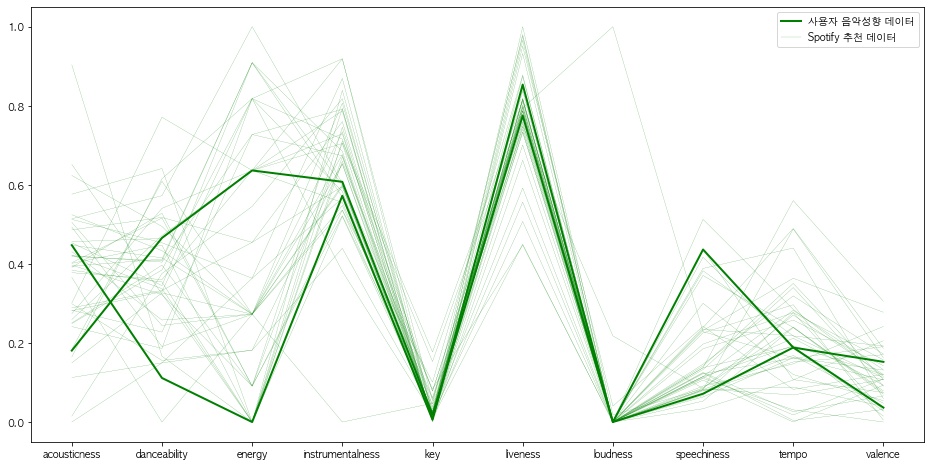

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
4,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
11,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
13,3P3UA61WRQqwCXaoFOTENd,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273c06f0e...
14,0jdny0dhgjUwoIp5GkqEaA,Praying,6LqNN22kT3074XbTVUrhzX,Kesha,https://i.scdn.co/image/ab67616d0000b27355de63...


In [15]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [20]:
res = db.regist_mail(mail_box_id, recos[reco_musics])
mail_id = res.inserted_id
print("우체통({})에\n추천 플레이리스트 MuLetter({})가 등록되었습니다.".format(
    mail_box_id
    ,str(mail_id)))

우체통(624be96e88f0095783fb9d9d)에
추천 플레이리스트 MuLetter(624be99b88f0095783fb9d9e)가 등록되었습니다.


In [21]:
genres

,artists,genres
0,3HqSLMAZ3g3d5poNaI7GOU,"k-pop,pop"
1,6zn0ihyAApAYV51zpXxdEp,"k-pop,pop"


In [23]:
recos[reco_musics].head()

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
4,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
11,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
13,3P3UA61WRQqwCXaoFOTENd,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273c06f0e...
14,0jdny0dhgjUwoIp5GkqEaA,Praying,6LqNN22kT3074XbTVUrhzX,Kesha,https://i.scdn.co/image/ab67616d0000b27355de63...


In [24]:
spotify.get_genres(token,recos[reco_musics]).head()

,artists,genres
0,6eUKZXaKkcviH0Ku9w2n3V,"pop,k-pop"
1,6dhfy4ByARPJdPtMyrUYJK,"k-pop,pop"
2,0hRHbwZ0xSwfVHl4FTv7jq,"k-pop,pop"
3,3HqSLMAZ3g3d5poNaI7GOU,"k-pop,pop"
4,6LqNN22kT3074XbTVUrhzX,pop
